# Project 2: Investigating TMDb Movies Dataset

## TABLE OF CONTENTS

A. Introduction

B. Data Wrangling

C. Exploratory Data Analysis

Conclusions

## A. INTRODUCTION:

TMDb movies dataset contained information about ten thousand movies and consisted of 21 columns.
In this project, my aim was to answer the following questions:
    
1)Which movies had the most and the least profit?

2)Which movies had the largest and smallest budgets?

3)Which movies had the largest and smallest revenues?

4)What was the average runtime of all the movies?

5)What does the distribution of the runtimes look like? Is it skewed in one direction or is it a normal distribution? (Also plot the runtime distribution using different graph types)

6)A) In which year, were the total profits of all the movies produced in that year the highest? B) Since 1960, how many movies made 50 million USD or higher profits?

7)What does the genre distribution look like for movies that made 50 million USD or higher profits?

## B. DATA WRANGLING:



In order to clean the data, I will be carrying out the following:

1) Remove unused columns

2) Remove the duplicate rows if there are any

3) Drop the movie entries with zero budgets

4) Changing release date column into proper date format

5) Replacing zero with NAN in Runtime column

6) Calculating the profit of each movie by subtracting the budget from the revenue



This cell below will be used to import the packages and the dataset that will be used in this project. I will also include the magic function that renders figures in a notebook. Source for the magic function: https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline

1) Below is a list of the columns I deleted since I didn't use them in my analysis. Then I executed a function that deleted the listed columns. After that, I viewed the first 3 rows of the dataset. 

In [230]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

tmdbData = pd.read_csv("tmdb-movies.csv")

del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#Deleting the listed columns
tmdbData = tmdbData.drop(del_col,1)

#Previewing the new dataset
tmdbData.head(3)


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


2) Below, I first deleted any duplicate rows then found out how many rows of movie entries there were left as well as how many columns. I also deleted one row from what was left since the first row is not a movie entry but just the titles of the columns.

In [231]:
tmdbData.drop_duplicates(keep ='first', inplace=True)
rows, col = tmdbData.shape

print('There are now {} total entries of movies and {} columns.'.format(rows-1, col))

There are now 10864 total entries of movies and 10 columns.


3) Below, I dropped the movie entries with 0 bugets. 

In [232]:
# This is to create a separate list of budget and revenue.
budget_and_revenue_list=['budget', 'revenue']

#This will replace all the "0" values with "NAN".
tmdbData[budget_and_revenue_list] = tmdbData[budget_and_revenue_list].replace(0, np.NAN)

#This will remove all the rows which have NAN values in budget_and_revenue_list
tmdbData.dropna(subset = budget_and_revenue_list, inplace = True)

rows, col = tmdbData.shape
print('After removing the entries with 0 values, we are left with {} movies.'.format(rows-1))

After removing the entries with 0 values, we are left with 3853 movies.


4) Below, I changed the release_date column into python date format (year-month-day).

In [236]:
tmdbData.release_date = pd.to_datetime(tmdbData['release_date'])
#printing the changed dataset
tmdbData.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


5) Below, I replaced 0's with NAN's in the runtime column.

In [237]:
#I replaced all the 0's with NAN's in the runtime column.

tmdbData['runtime'] =tmdbData['runtime'].replace(0, np.NAN)

In [238]:
#Getting the type of each column
tmdbData.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

6. As a first step to my data analysis, I calculated the profit of each movie and inserted this as a new column. Then I previewed the data using only 3 columns.

In [239]:

#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
tmdbData.insert(2,'profit_earned',tmdbData['revenue']-tmdbData['budget'])

#previewing the changes in the dataset
tmdbData.head(3)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


## C. Exploratory Data Analysis:

In this section, I will start answering the questions I asked in the introduction.
The questions I asked in the introduction were the following:

1)Which movies had the most and the least profit?

2)Which movies had the largest and smallest budgets?

3)Which movies had the largest and smallest revenues?

4)What was the average runtime of all the movies?

5)What does the distribution of the runtimes look like? Is it skewed in one direction or is it a normal distribution? (Also plot the runtime distribution using different graph types)

6)A) In which year, were the total profits of all the movies produced in that year the highest? B) Since 1960, how many movies made 50 million USD or higher profits?

7)What does the genre distribution look like for movies that made 50 million USD or higher profits?




### Question 1: Which movies had the most and the least profits?

In [240]:
import pprint

#Defining the function for calculating the maximum and minimum in a given column 
#This function will be for other calculations as well.

def calculate(column):
    
    #Highest Profit
    
    high= tmdbData[column].idxmax()
    
    high_details=pd.DataFrame(tmdbData.loc[high])
    
    #Lowest Profit
    low= tmdbData[column].idxmin()
    low_details=pd.DataFrame(tmdbData.loc[low])
    
    
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function

calculate('profit_earned')

,1386,2244
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
profit_earned,2.54451e+09,-4.13912e+08
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


Answer 1: Entry 1386 (Avatar) is the movie with the highest profit and entry 2244 (Tha Warrior's Way) is the movie with the lowest profit (negative means the movie lost money).

### Question 2: Which movies had the largest and smallest budgets?

In [241]:
#We will call the same function we used before (calculate(column))

calculate('budget')


,2244,2618
budget,4.25e+08,1
revenue,1.10876e+07,100
profit_earned,-4.13912e+08,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


Answer 2: The movie with the highest budget was The Warrior's Way and the movie with the lowest budget was Lost & Found.

### Question 3: Which movies had the largest and smallest revenues?

In [242]:
# We will call the same function we used before (calculate(column))

calculate('revenue')

,1386,5067
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
profit_earned,2.54451e+09,-6e+06
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


Answer 3: Entry 1386 (Avatar) shows the movie with the largest revenue and entry 5067 (Shattered Glass) shows the movie with the smallest revenue. 


### Question 4: What was the average runtime of all the movies?

In [197]:
#defining a function to find average of a column
def avg_fun(column):
    return tmdbData[column].mean()

#calling above function
avg_fun('runtime')


109.22029060716139

Answer 4: 109.22029060716139 was the average runtime of all the movies in the dataset 

### Question 5: What does the distribution of the runtimes look like? Is it skewed in one direction or is it a normal distribution? (Also plot the runtime distribution using different graph types)

I wanted to explore the distrbution of the movie runtimes by plotting the runtime versus number of movies using two different methods (histogram and swarm plot).

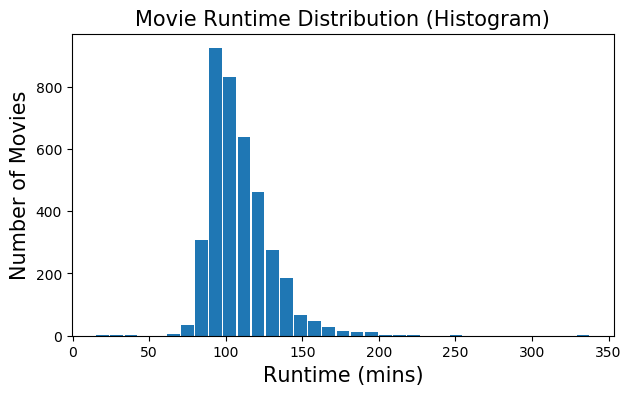

In [254]:
#Histogram: Runtime vs. Number of movies 

#Figure Size:(width, height)
plt.figure(figsize=(7,4), dpi = 100)

#On x-axis 
plt.xlabel('Runtime (mins)', fontsize = 15)
#On y-axis 
plt.ylabel('Number of Movies', fontsize=15)
#Name of the graph
plt.title('Movie Runtime Distribution (Histogram)', fontsize=15)

#giving a histogram plot
plt.hist(tmdbData['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

Answer 5: The distribution of the above formed graph is right skewed or positively skewed. Most of the movies are timed between 80 to 120 minutes. 

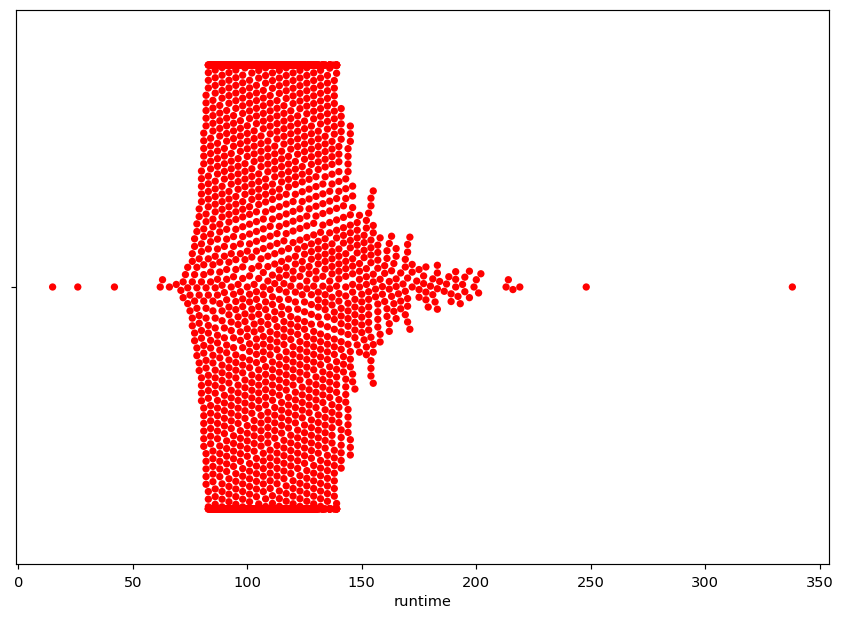

In [250]:
#Swarm Plot:

#Defining figure size: 

plt.figure(figsize=(10,7), dpi = 105)
#using seaborn to generate the plot
sns.swarmplot(tmdbData['runtime'], color = 'red')
#displaying the plot
plt.show()

### Question 6: A) In which year, were the total profits of all the movies produced in that year the highest and the lowest? B) Since 1960, how many movies made 50 million USD or higher profits?

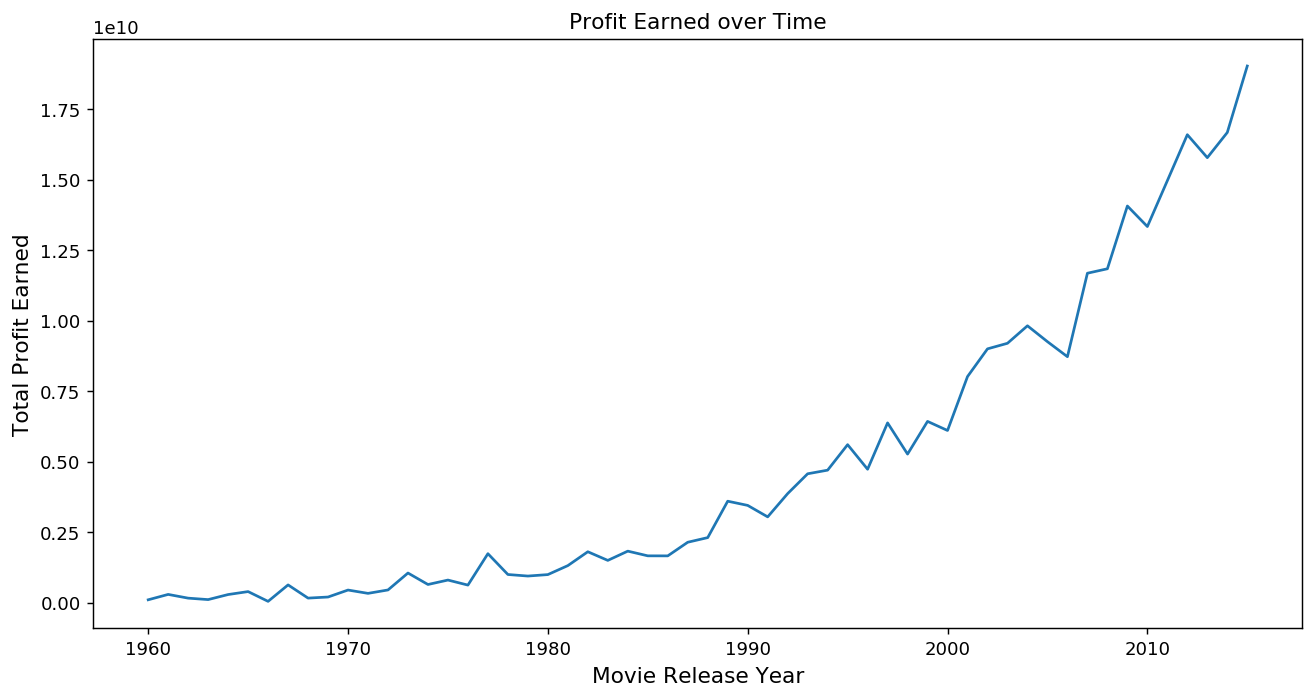

In [249]:
# Line Plot: Year vs. total profits from all the movies in that year

profits_year = tmdbData.groupby('release_year')['profit_earned'].sum()

#Figure Size: (width, height)
plt.figure(figsize=(12,6), dpi = 130)

#x-axis
plt.xlabel('Movie Release Year', fontsize = 12)

#y-axis
plt.ylabel('Total Profit Earned', fontsize = 12)

#Plot Title
plt.title('Profit over Time')

#Plotting the Graph
plt.plot(profits_year)

#Displaying the graph
plt.show()

In [285]:
#To find that which year made the highest profit?

profits_year.idxmax()



2015

In [287]:
profits_year.idxmin()

1966

Answer 6A: In 2015, the total of the profits was the highest while in 1966, the total profits were the lowest. The dataset only includes movies between 1960 and 2015. 

In [255]:
#Movies with 50 million USD or higher profits: 

high_profit_data = tmdbData[tmdbData['profit_earned'] >= 50000000]

high_profit_data.index = range(len(profit_data))

#Starting from 1 instead of 0
high_profit_data.index = profit_data.index + 1

high_profit_data.head(3)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
2,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
3,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
4,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [256]:
#counting the no.of rows in the new data base
len(high_profit_data)

1338

Answer 6B: In total, 1338 movies earned 50 million USD or higher since 1960. 

### Question 7: What does the genre distribution look like for movies that made 50 million USD or higher profits?

In [272]:
#Function which will take any column as argument from and keep its track

def data(column):
    #Will take a column, and separate the string by '|'
    data = high_profit_data[column].str.cat(sep = '|')
    
    #Giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #Arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [273]:
#variable to store the retured value
count = data('genres')
#printing top 5 genres
count.head(5)

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

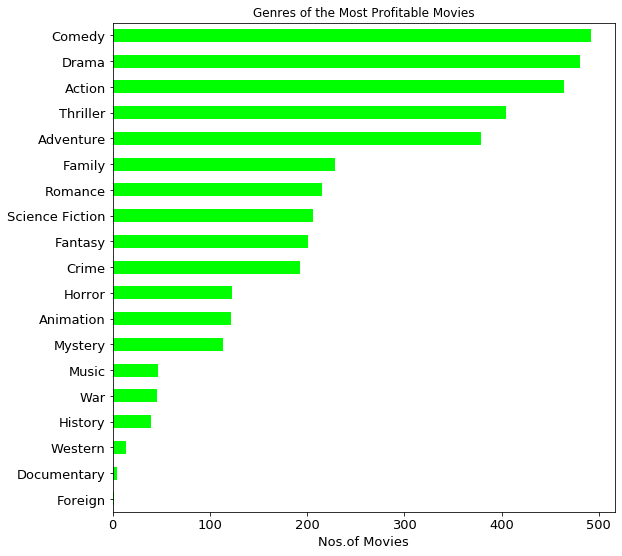

In [274]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#00FF00', fontsize = 13)

#title
lt.set(title = 'Genres of the Most Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(9, 9)

#ploting the graph
plt.show(10)

### Question 8: What does the cast look like for movies that made 50 million USD or higher profits? Which actors/actresses are associated with profitable movies?

In [280]:
#variable to store the retured value
count = data('cast')
#printing top 5 genres
count.head(10)


Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
Bruce Willis          19
Harrison Ford         19
Denzel Washington     19
Jim Carrey            19
Robert De Niro        19
dtype: int64

Answer 8: The top three actors associated with high profit movies are Tom Cruise, Brad Pitt and Tom Hanks. 


## D. Conclusions:

This project allowed me to use my python and data analysis skills. My conclusions were as followed:

There are 10864 entries of movies in the dataset. Avatar which came out in 2009 made the highest profit while The Warrior’s Way which came out in 2010 made the smallest profit out of all the movies in this dataset. The movie with the largest budget was The Warrior’s Way. This could be related to why it made the smallest profit since profit is associated with budget and revenue. The movie with the smallest budget was Lost & Found. The movie with the largest revenue was Avatar. This could be correlated to its high profit. The movie with the smallest revenue was Shattered Glass. The average runtime of all the movies in the dataset was 109.22 minutes. The runtime distribution of the movies was right (or positively) skewed where the majority of the movies lasted between 80 to 120 minutes. In 2015, the total of the profits of all the movies was the highest, while in 1966, the total profits were the lowest. The dataset only includes movies between 1960 and 2015. Out of the 10864 movies made since 1960, 1338 of them made 50 million USD or higher in profits. Comedy is the most popular genre for the high profit movies followed by drama and action. The top three actors associated with the high profit movies are Tom Cruise, Brad Pitt and Tom Hanks. 

Limitations: The data provided might not be accurate or up to date. The budget and revenue columns did not have a currency unit so I assumed they were all in US dollars but they might not be. I also dropped the rows with missing values which which can affect the reliability of my analysis. 